In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import scipy.optimize
import pandas as pd
import os

# Galaxy Flux Method

Text(0.5, 1.0, 'Histogram of g magnitude')

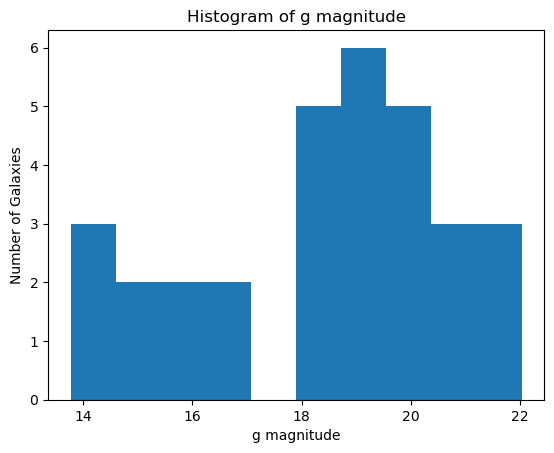

In [2]:
#Upload csv file with compiled galaxy data
data = pd.read_csv('Galaxy Data Sheet.csv') # replace line here with the path to the file

g_mean_mag = data['phot_g_mean_mag']

#Plot as a histogram
plt.hist(g_mean_mag)
plt.xlabel('g magnitude')
plt.ylabel('Number of Galaxies')
plt.title('Histogram of g magnitude')

18.43133893548386


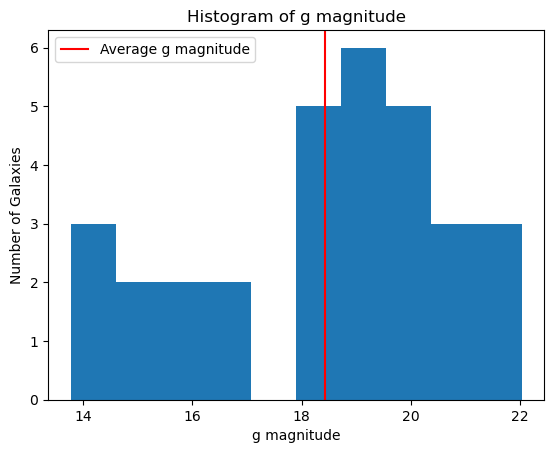

In [3]:
#Find average g magnititude of galaxies
average_g_mag = np.mean(g_mean_mag)
print(average_g_mag)


#Plot histagram again, this time with the average value marked
plt.hist(g_mean_mag)
plt.axvline(average_g_mag, color='r')
plt.xlabel('g magnitude')
plt.ylabel('Number of Galaxies')
plt.title('Histogram of g magnitude')
plt.legend(['Average g magnitude'])
plt.show()

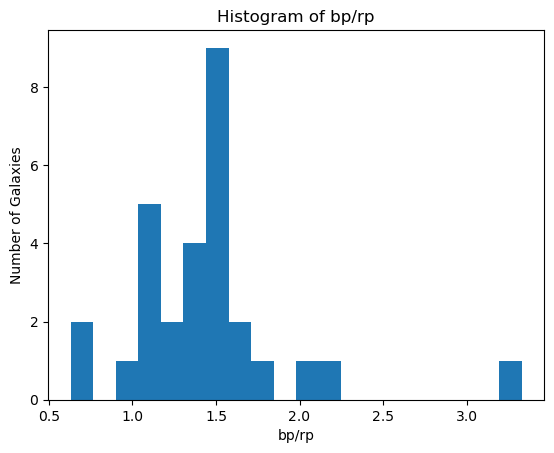

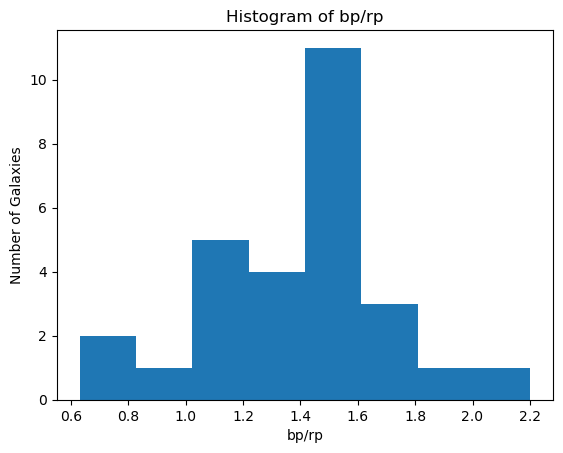

In [4]:
#Get bp/rp magnitude data

bp_rp = data['bp_rp']

#Plot bp/rp as a histogram
plt.hist(bp_rp, bins = 20)
plt.xlabel('bp/rp')
plt.ylabel('Number of Galaxies')
plt.title('Histogram of bp/rp')
plt.show()

#Ignore outliers
bp_rp2 = bp_rp[bp_rp < 3]
plt.hist(bp_rp2, bins=8)
plt.xlabel('bp/rp')
plt.ylabel('Number of Galaxies')
plt.title('Histogram of bp/rp')
plt.show()

1.3877384321428567


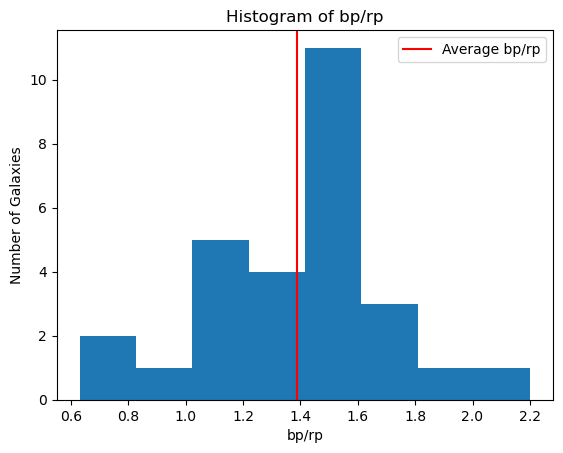

In [5]:
#Get average bp/rp value (excluding outliers)
average_bp_rp = np.mean(bp_rp2)
print(average_bp_rp)

#Plot again, this time with average as a line
plt.hist(bp_rp2, bins=8)
plt.axvline(average_bp_rp, color='r')
plt.xlabel('bp/rp')
plt.ylabel('Number of Galaxies')
plt.title('Histogram of bp/rp')
plt.legend(['Average bp/rp'])
plt.show()

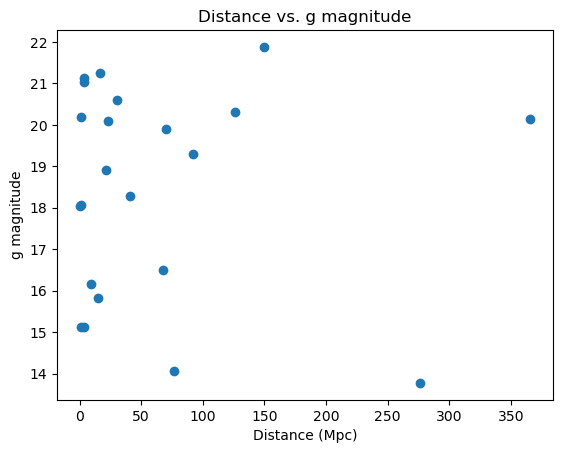

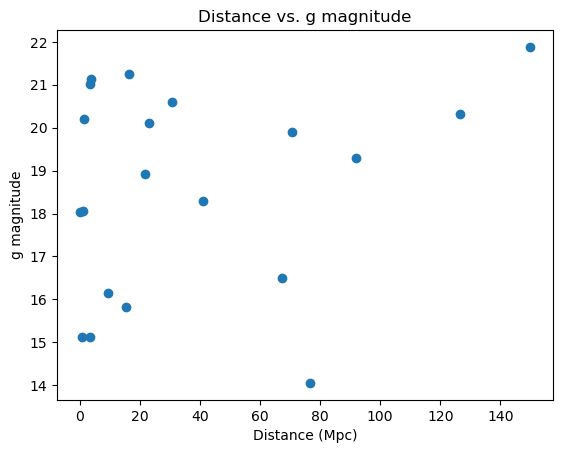

In [6]:
#Plot the magnittude as a function of distance, using the distance that other people have calculated
dist_given = data['distance_known (Mpc)']

plt.plot(dist_given, g_mean_mag, 'o')
plt.xlabel('Distance (Mpc)')
plt.ylabel('g magnitude')
plt.title('Distance vs. g magnitude')
plt.show()

#Remove outliers
dist_given2 = dist_given[dist_given < 200]
g_mean_mag2 = g_mean_mag[dist_given < 200]

plot2 = plt.plot(dist_given2, g_mean_mag2, 'o')
plt.xlabel('Distance (Mpc)')
plt.ylabel('g magnitude')
plt.title('Distance vs. g magnitude')
plt.show()

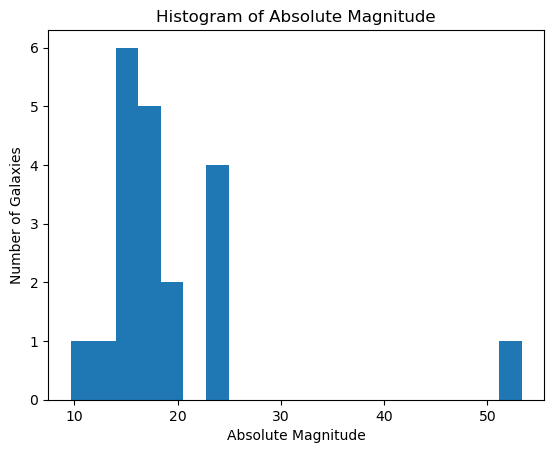

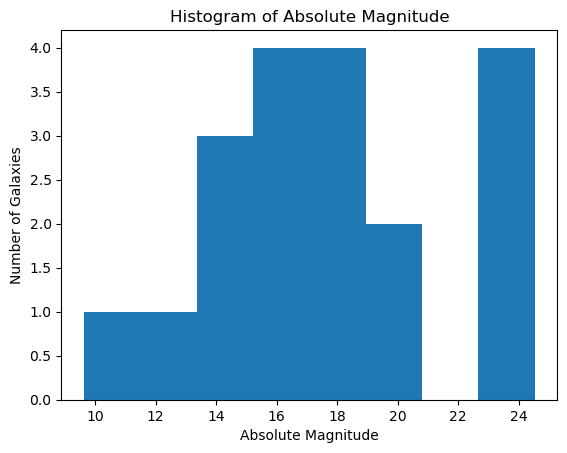

In [7]:
#Calculate Absolute magnitude
abs_mag = g_mean_mag2 - 5 * np.log10(dist_given2) + 5

plt.hist(abs_mag, bins=20)
plt.xlabel('Absolute Magnitude')
plt.ylabel('Number of Galaxies')
plt.title('Histogram of Absolute Magnitude')
plt.show()

#Remove outliers
abs_mag2 = abs_mag[abs_mag < 30]
plt.hist(abs_mag2, bins=8)
plt.xlabel('Absolute Magnitude')
plt.ylabel('Number of Galaxies')
plt.title('Histogram of Absolute Magnitude')
plt.show()

In [8]:
#Find average Abs. Mag
average_abs_mag = np.mean(abs_mag2)
print(average_abs_mag)

17.617221330604792


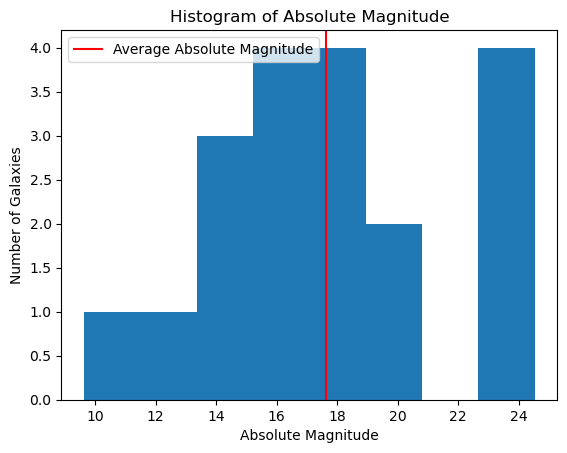

In [9]:
#Plot again with Avg marked
plt.hist(abs_mag2, bins=8)
plt.axvline(average_abs_mag, color='r')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Number of Galaxies')
plt.title('Histogram of Absolute Magnitude')
plt.legend(['Average Absolute Magnitude'])
plt.show()

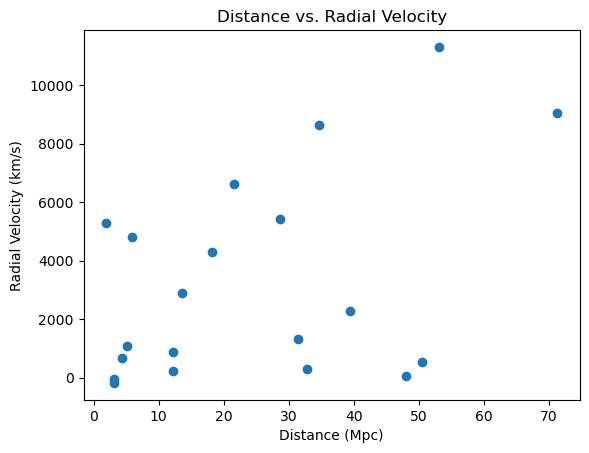

Text(0.5, 1.0, 'Distance vs. Radial Velocity')

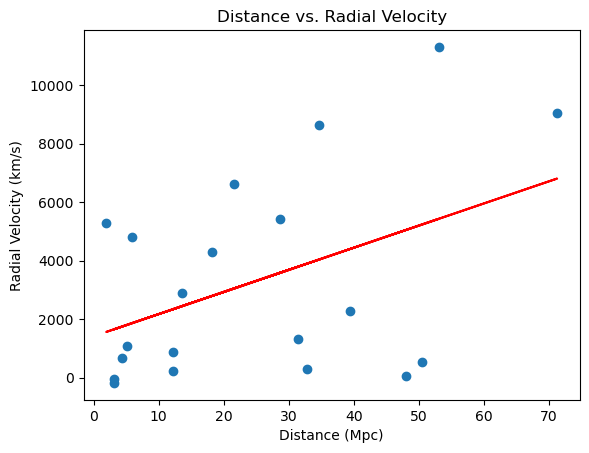

In [10]:
#Get radial velocity value from data
r_vel = data['radial_velocity (km/s)']

#Find distances assuming abs mag is equal to the average for all galaxies
distance = 10 ** ((g_mean_mag2 - average_abs_mag +5 ) / 5)

mask = dist_given < 200
r_vel = r_vel[mask]

plt.plot(distance, r_vel, 'o')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Radial Velocity (km/s)')
plt.title('Distance vs. Radial Velocity')
plt.show()

#Get line of best fit
slope, intercept = np.polyfit(distance, r_vel, 1)
line = slope * distance + intercept
plt.plot(distance, r_vel, 'o')
plt.plot(distance, line, 'r')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Radial Velocity (km/s)')
plt.title('Distance vs. Radial Velocity')

In [11]:
#Find value of H0 from the slope of the line of best fit
H0 = slope
print("H0 Value =", H0)

H0 Value = 75.59392638980387


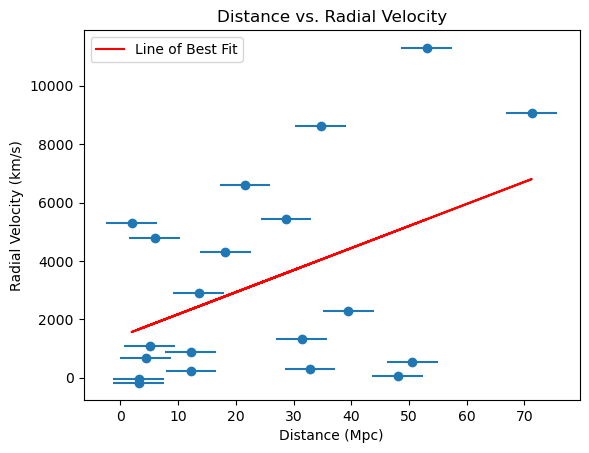

In [12]:
#Plot error bars for data
vel_error = data['vel_error'][mask]
distance_error = np.std(distance) / np.sqrt(len(distance))

plt.errorbar(distance, r_vel,xerr=distance_error, yerr=vel_error, fmt='o')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Radial Velocity (km/s)')
plt.plot(distance, line, 'r')
plt.title('Distance vs. Radial Velocity')
plt.legend(['Line of Best Fit'])
plt.show()


In [13]:
print('Standard Deviation:', np.std(distance))

Standard Deviation: 19.63509477183553


In [14]:
#Get Pearson Correlation Coefficient
r= np.corrcoef(distance, r_vel)
print('Pearson Coeff. =', r[0,1])

Pearson Coeff. = 0.4372924930889367


In [15]:
print("H0 Value =", H0)
print('Standard Deviation:', np.std(distance))
print('Pearson Coeff. =', r[0,1])

H0 Value = 75.59392638980387
Standard Deviation: 19.63509477183553
Pearson Coeff. = 0.4372924930889367


# Type 1a Supernovae Method

In [16]:
# Fucntion for the linear fit
def linear(X,m,b):
    Y = m*X+b
    return Y

# Function to calulate distance modulus in [Mpc]
def Dist_mod(app, abs):   
    u = 10 * (10 ** ((app-abs) / 5)) * (10 ** -6)
    return u 

# Function to calculate recessional velocity in [km/s]
def Recess_vel(red):
    v = (2.9979*(10**5)) * (((red+1)**2)-1) / (((red+1)**2)+1)
    return v

In [17]:
# Open up the json file with Type 1a Supernovae data
with open('Type-Ia-Supernova-Data.json', 'r') as file:
    data = json.load(file)

In [18]:
# Establish redshift and magnitude arrays and fill them with the proper data
redshift = np.zeros(len(data[1][1:-1]))
magnitude = np.zeros(len(data[1][1:-1]))

for i in range(len(data[1][1:-1])):
    redshift[i] = data[1][i+1][2][2]
    magnitude[i] = data[1][i+1][3][2]

In [19]:
# Establish distance and recessional velocity arrays
dist = np.zeros(len(magnitude))
vel = np.zeros(len(redshift))

# Calculate the distances and recessional velocities
for i in range(len(magnitude)):
    dist[i] = Dist_mod(magnitude[i], -19.3)
    vel[i] = Recess_vel(redshift[i])

Text(0.5, 1.0, 'Hubble Constant Plot H0=26.34')

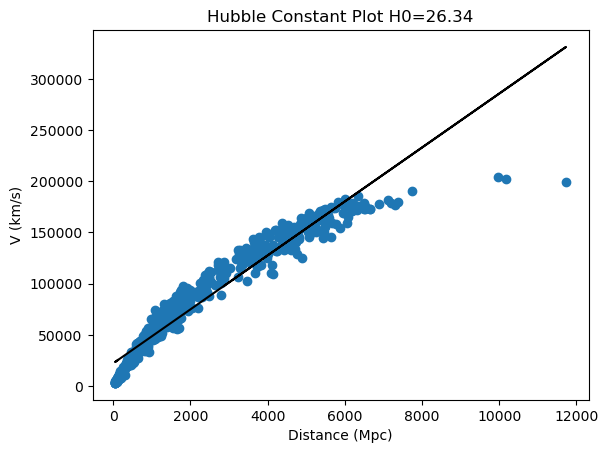

In [20]:
# Plot the data and establish/plot a linear fit
plt.scatter(dist,vel)

pars,_ = scipy.optimize.curve_fit(linear, dist, vel)
y_curvefit = linear(dist, *pars)
plt.plot(dist,y_curvefit, color='k')
H0 = round(pars[0], 2)

plt.xlabel('Distance (Mpc)')
plt.ylabel('V (km/s)')
plt.title('Hubble Constant Plot H0='+str(H0))

In [21]:
#Print the Hubble Constant for this data
print(pars[0])

26.343806423567397


In [22]:
# Establish indices for redshifts < 0.1
ind = []
for i in range(len(redshift)):
    if redshift[i] < .1:
        ind.append(i)

In [23]:
# Establish a new magnitude and redshift array and fill them
new_mag = np.zeros(len(ind))
new_red = np.zeros(len(ind))

for i in range(len(ind)):
    new_mag[i] = magnitude[ind[i]]
    new_red[i] = redshift[ind[i]]

In [24]:
#Establish new distance and recessional velocity arrays
new_dist = np.zeros(len(ind))
new_vel = np.zeros(len(ind))

# Calculate the new distances and recessional velocities
for i in range(len(ind)):
    new_dist[i] = Dist_mod(new_mag[i], -19.3)
    new_vel[i] = Recess_vel(new_red[i])

Text(0.5, 1.0, 'Hubble Constant Plot H0=51.79')

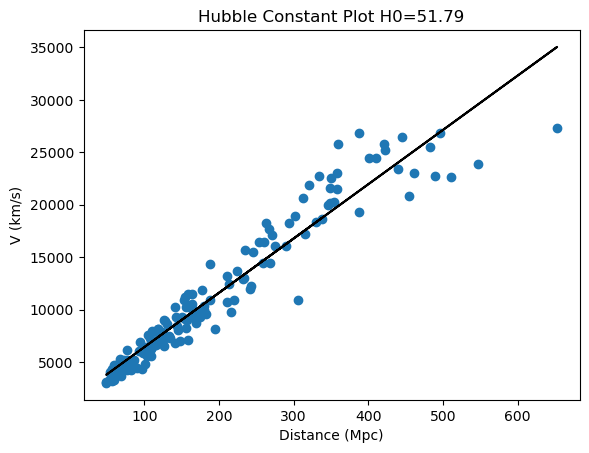

In [25]:
# Plot the data and establish/plot a linear fit
plt.scatter(new_dist,new_vel)

new_pars,_ = scipy.optimize.curve_fit(linear, new_dist, new_vel)
new_y_curvefit = linear(new_dist, *new_pars)
plt.plot(new_dist,new_y_curvefit, color='k')
new_H0 = round(new_pars[0], 2)

plt.xlabel('Distance (Mpc)')
plt.ylabel('V (km/s)')
plt.title('Hubble Constant Plot H0='+str(new_H0))

In [26]:
# Print the new Hubble Constant
print(new_pars[0])

51.79399748995804
